# Importing modules

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Importing Data

In [ ]:
df = pd.read_csv("churn_prediction.csv")
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


# Familiarizing with data

In [ ]:
df.churn.value_counts()

0    23122
1     5260
Name: churn, dtype: int64

In [ ]:
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [ ]:
df.dependents.value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

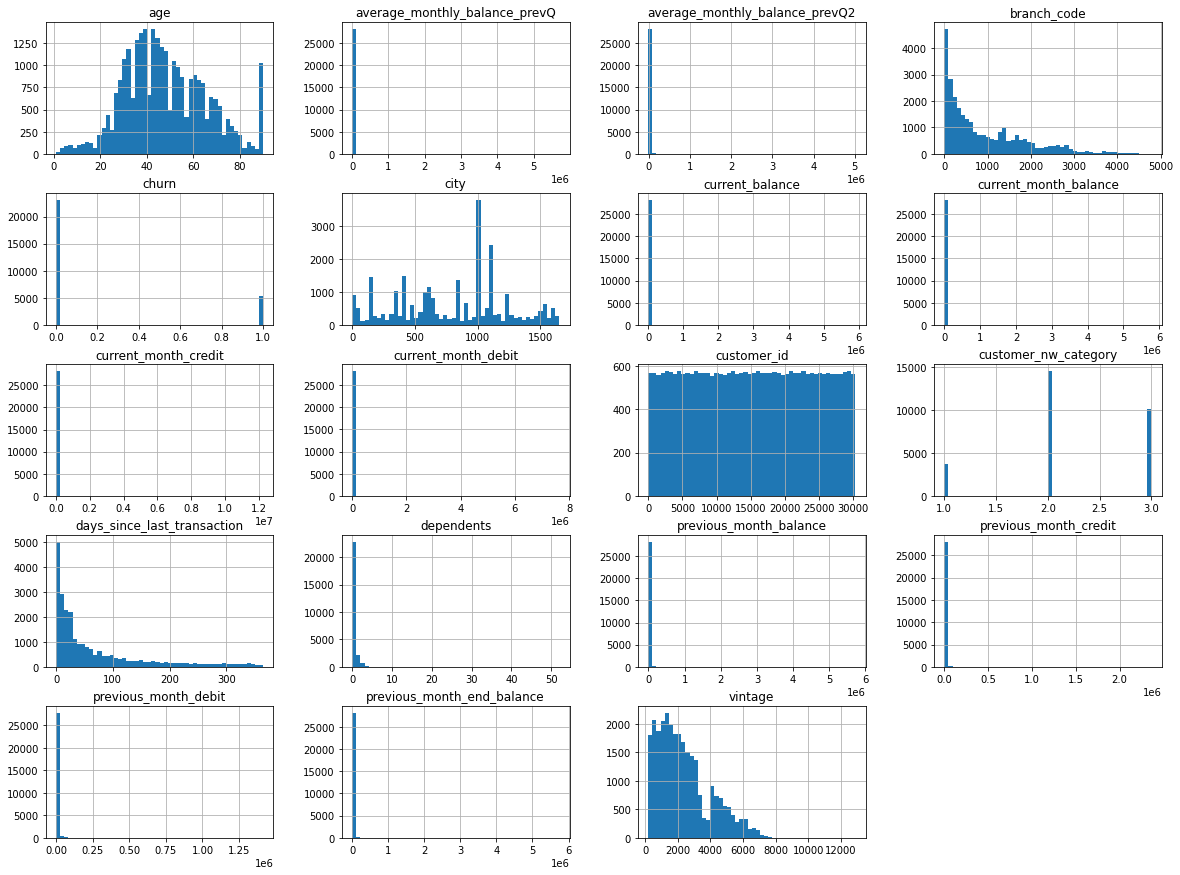

In [ ]:
df.hist(figsize = (20,15), bins = 50 );

In [ ]:
df.shape

(28382, 21)

In [ ]:
drop_df = df.dropna(axis = 0, how = 'any' )

In [ ]:
drop_df.churn.value_counts()

0    17793
1     4274
Name: churn, dtype: int64

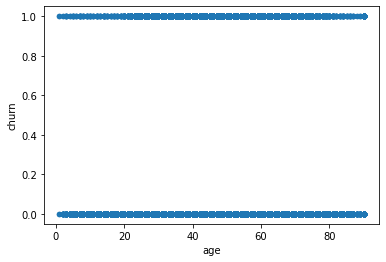

In [ ]:
df.plot.scatter("age" , "churn")

In [ ]:
df.corr()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,-0.006093,-0.000442,-0.008616,0.000743,0.009618,-0.000286,0.010267,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.002723
vintage,-0.006093,1.000000,0.227390,0.036987,0.044200,-0.167366,-0.380714,-0.088744,0.002986,0.004518,0.003433,0.002244,0.002848,0.028034,0.005406,0.023949,0.001638,0.003448,-0.064637
age,-0.000442,0.227390,1.000000,-0.000612,0.015439,-0.076532,-0.058990,-0.016679,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,-0.008616,0.036987,-0.000612,1.000000,0.001892,0.013134,0.020141,-0.079834,-0.003070,0.000216,0.001213,0.002949,0.003260,0.025054,0.008207,0.032021,-0.000652,0.001239,0.033487
city,0.000743,0.044200,0.015439,0.001892,1.000000,0.006613,-0.061234,-0.004309,-0.005654,-0.004089,-0.006298,-0.007891,0.004118,0.008087,0.001465,0.005995,-0.005796,-0.005839,-0.001585
customer_nw_category,0.009618,-0.167366,-0.076532,0.013134,0.006613,1.000000,0.235059,0.049531,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,-0.000286,-0.380714,-0.058990,0.020141,-0.061234,0.235059,1.000000,0.038708,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
days_since_last_transaction,0.010267,-0.088744,-0.016679,-0.079834,-0.004309,0.049531,0.038708,1.000000,-0.019990,-0.014400,-0.012709,-0.006384,-0.033131,-0.071657,-0.039165,-0.070192,-0.017837,-0.011738,-0.055830
current_balance,0.006589,0.002986,0.054346,-0.003070,-0.005654,-0.058314,0.000181,-0.019990,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,0.005819,0.004518,0.058342,0.000216,-0.004089,-0.059854,0.000214,-0.014400,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886


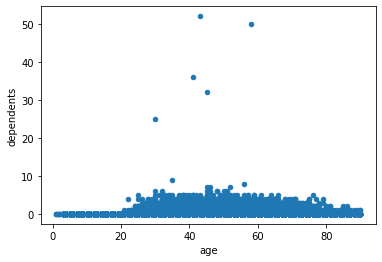

In [ ]:
df.plot.scatter( "age", "dependents")

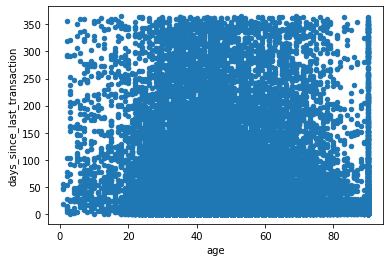

In [ ]:
df.plot.scatter("age", "days_since_last_transaction")

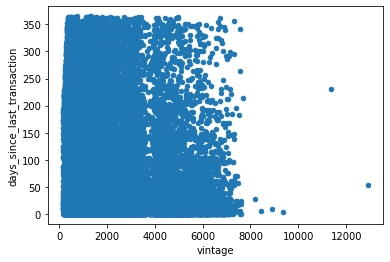

In [ ]:
df.plot.scatter("vintage", "days_since_last_transaction")

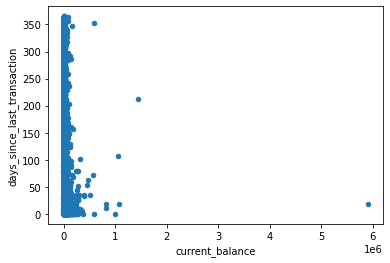

In [ ]:
df.plot.scatter("current_balance", "days_since_last_transaction")

In [ ]:
df.gender.value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [ ]:
pd.crosstab(df.churn, df.gender)

gender,Female,Male
churn,,
0,9324,13379
1,1985,3169


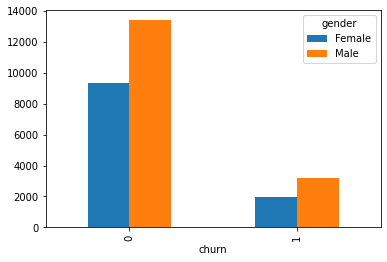

In [ ]:
pd.crosstab(df.churn, df.gender).plot(kind = "bar")

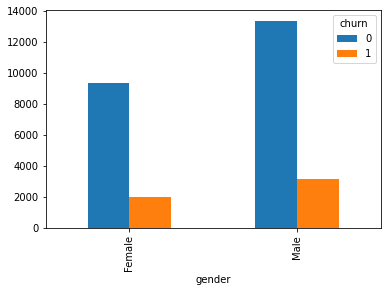

In [ ]:
pd.crosstab(df.churn, df.gender).T.plot(kind = "bar")

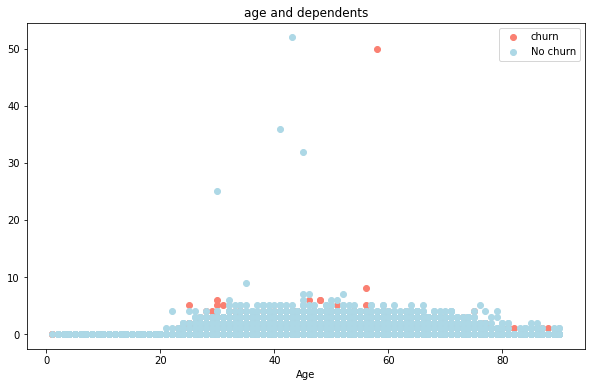

In [ ]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.churn==1], 
            df.dependents[df.churn==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.churn==0], 
            df.dependents[df.churn==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("age and dependents")
plt.xlabel("Age")
plt.legend(["churn", "No churn"])

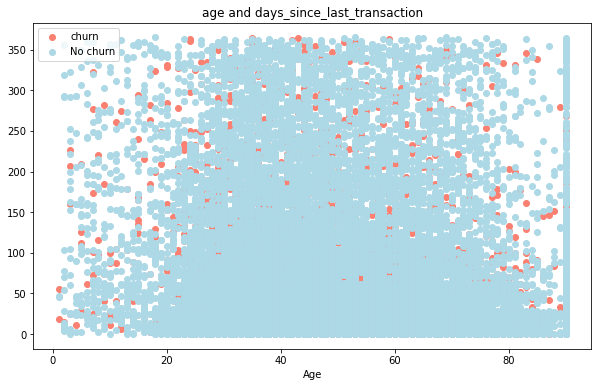

In [ ]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.churn==1], 
            df.days_since_last_transaction[df.churn==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.churn==0], 
            df.days_since_last_transaction[df.churn==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("age and days_since_last_transaction")
plt.xlabel("Age")
plt.legend(["churn", "No churn"])

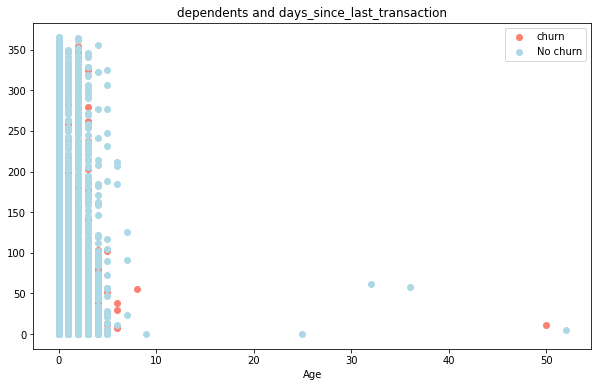

In [ ]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.dependents[df.churn==1], 
            df.days_since_last_transaction[df.churn==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.dependents[df.churn==0], 
            df.days_since_last_transaction[df.churn==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("dependents and days_since_last_transaction")
plt.xlabel("Age")
plt.legend(["churn", "No churn"])

In [ ]:
df.dependents[df.churn == 1].value_counts()

0.0     3735
2.0      485
1.0      319
3.0      150
4.0       33
5.0        5
6.0        4
50.0       1
8.0        1
Name: dependents, dtype: int64

# Filling the missing data



In [ ]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                          int64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

We have 5 columns which has missing values:

* gender
* dependents
* occupation
* city
* days_since_last_transaction 

## Occupation

Here the column "**Occupation**" with missing values are filled with value "**Self_employed**" which is most frequent.

One more column with binary value i.e. True and False, is added under column name "**occupation_with_missing_data**".

In [ ]:
df.occupation.value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [ ]:
pd.crosstab(df.occupation, df.churn)

churn,0,1
occupation,,
company,36,4
retired,1719,305
salaried,5557,1147
self_employed,14076,3480
student,1734,324


In [ ]:
for name, content in df.items():
  if name == "occupation":
    df["occupation_with_missing_data"] = pd.isnull(content)

In [ ]:
df["occupation"].fillna(value = "self_employed", inplace = True)

In [ ]:
df.shape

(28382, 22)

In [ ]:
df.occupation_with_missing_data.value_counts()

False    28302
True        80
Name: occupation_with_missing_data, dtype: int64

## dependents

Here the column "**dependents**" with missing values are filled with value "**0**".
In the next step, the column values are converted to ***int*** type.

One more column with binary value i.e. True and False, is added under column name "**dependents_with_missing_data**".

In [ ]:
df.dependents[df.churn == 1].value_counts()

0.0     3735
2.0      485
1.0      319
3.0      150
4.0       33
5.0        5
6.0        4
50.0       1
8.0        1
Name: dependents, dtype: int64

In [ ]:
df.dependents[df.churn == 0].value_counts()

0.0     17700
2.0      1665
1.0      1076
3.0       551
4.0       146
5.0        36
6.0         4
7.0         3
36.0        1
52.0        1
9.0         1
25.0        1
32.0        1
Name: dependents, dtype: int64

In [ ]:
df.dependents[df.churn == 1].isna().sum()

527

In [ ]:
df.dependents[df.churn == 0].isna().sum()

1936

In [ ]:
for name, content in df.items():
  if name == "dependents":
    df["dependents_with_missing_data"] = pd.isnull(content)

In [ ]:
df.dependents.fillna(value = 0, inplace = True)
df.dependents = df.dependents.astype("int")

## city

Here the column "**city**" is anonymised with float value. So, in place of missing values, "**0**" is inserted and then converted to **int** value.

One more column with binary value i.e. True and False, is added under column name "**city_with_missing_data**".



In [ ]:
for name, content in df.items():
  if name == "city":
    df["city_with_missing_data"] = pd.isnull(content)

In [ ]:
df.city.fillna(value = 0, inplace = True)
df["city"] = df["city"].astype(int)

In [ ]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,dependents_with_missing_data,occupation_with_missing_data,city_with_missing_data
0,1,3135,66,Male,0,self_employed,187,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,False,False,False
1,2,310,35,Male,0,self_employed,0,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,False,False,True
2,4,2356,31,Male,0,salaried,146,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,False,False,False
3,5,478,90,NaN,0,self_employed,1020,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,True,False,False
4,6,2531,42,Male,2,self_employed,1494,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,False,False,False


## gender

Here the column "gender" with missing value is filled the value "missing".

One more column with binary value i.e. True and False, is added under column name "**gender_with_missing_data**".

In [ ]:
for name, content in df.items():
  if name == "gender":
    df["gender_with_missing_data"] = pd.isnull(content)

In [ ]:
df["gender"].fillna(value = "missing", inplace = True) 

In [ ]:
df.gender_with_missing_data.value_counts()

False    27857
True       525
Name: gender_with_missing_data, dtype: int64

## Days since last transaction

Here the column "**days_since_last_transaction**" is filled with the median value i.e.** 30**.

One more column with binary value i.e. True and False, is added under column name "**days_since_last_transaction_with_missing_data**".

In [ ]:
for name, content in df.items():
  if name == "days_since_last_transaction":
    df["days_since_last_transaction_with_missing_data"] = pd.isnull(content)

In [ ]:
df["days_since_last_transaction"].fillna(value = 30, inplace =True) 

In [ ]:
df.isna().sum()

customer_id                                      0
vintage                                          0
age                                              0
gender                                           0
dependents                                       0
occupation                                       0
city                                             0
customer_nw_category                             0
branch_code                                      0
days_since_last_transaction                      0
current_balance                                  0
previous_month_end_balance                       0
average_monthly_balance_prevQ                    0
average_monthly_balance_prevQ2                   0
current_month_credit                             0
previous_month_credit                            0
current_month_debit                              0
previous_month_debit                             0
current_month_balance                            0
previous_month_balance         

# export filled dataset

In [ ]:
dframe = df.to_csv("filled_churn_prediction.csv")

In [ ]:
dframe

In [ ]:
df = pd.read_csv("filled_churn_prediction.csv")

In [ ]:
df.head()

,Unnamed: 0,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,dependents_with_missing_data,occupation_with_missing_data,city_with_missing_data,gender_with_missing_data,days_since_last_transaction_with_missing_data
0,0,1,3135,66,Male,0,self_employed,187,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,False,False,False,False,False
1,1,2,310,35,Male,0,self_employed,0,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,False,False,True,False,False
2,2,4,2356,31,Male,0,salaried,146,2,41,30.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,False,False,False,False,True
3,3,5,478,90,missing,0,self_employed,1020,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,True,False,False,True,False
4,4,6,2531,42,Male,2,self_employed,1494,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,False,False,False,False,False
